In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/web-traffic-time-series-forecasting/sample_submission_2.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/sample_submission_1.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/train_2.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/key_1.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/key_2.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/train_1.csv.zip


In [5]:
df=pd.read_csv('/kaggle/input/web-traffic-time-series-forecasting/train_1.csv.zip',compression="zip")

In [6]:
df.fillna(method='ffill', inplace=True)

<ipython-input-6-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
df.isnull().sum()

Page          0
2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
             ..
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
2016-12-31    0
Length: 551, dtype: int64

In [8]:
pages=df['Page']

In [9]:
pages

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
                                ...                        
145058    Underworld_(serie_de_películas)_es.wikipedia.o...
145059    Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060    Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061    Hasta_el_último_hombre_es.wikipedia.org_all-ac...
145062    Francisco_el_matemático_(serie_de_televisión_d...
Name: Page, Length: 145063, dtype: object

In [10]:
train=df.drop("Page",axis=1)

In [11]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [12]:
df.shape

(145063, 551)

In [13]:
train.head(),train.shape

(   2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
 0        18.0        11.0         5.0        13.0        14.0         9.0   
 1        11.0        14.0        15.0        18.0        11.0        13.0   
 2         1.0         0.0         1.0         1.0         0.0         4.0   
 3        35.0        13.0        10.0        94.0         4.0        26.0   
 4        35.0        13.0        10.0        94.0         4.0        26.0   
 
    2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-22  \
 0         9.0        22.0        26.0        24.0  ...        32.0   
 1        22.0        11.0        10.0         4.0  ...        17.0   
 2         0.0         3.0         4.0         4.0  ...         3.0   
 3        14.0         9.0        11.0        16.0  ...        32.0   
 4        14.0         9.0        11.0        16.0  ...        48.0   
 
    2016-12-23  2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
 0        63.0        15

# Let us perform some visualisation

In [10]:
import matplotlib.pyplot as plt
def plot_time_series(df,row_num,start_col=1,ax=None):
    if ax is None:
        fig=plt.figure(facecolor='b',figsize=(10,6))
        ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()

    series_title=df.iloc[row_num,0]
    series_data=df.iloc[row_num,start_col :]
    series_data.plot(style="-",ax=ax)
    ax.set_title(f"Series title is : {series_title}")
    

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26757 (\N{CJK UNIFIED IDEOGRAPH-6885}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 40599 (\N{CJK UNIFIED IDEOGRAPH-9E97}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21490 (\N{CJK UNIFIED IDEOGRAPH-53F2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 32736 (\N{CJK UNIFIED IDEOGRAPH-7FE0}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26757 (\N{CJK UNIFIED IDEOGRA

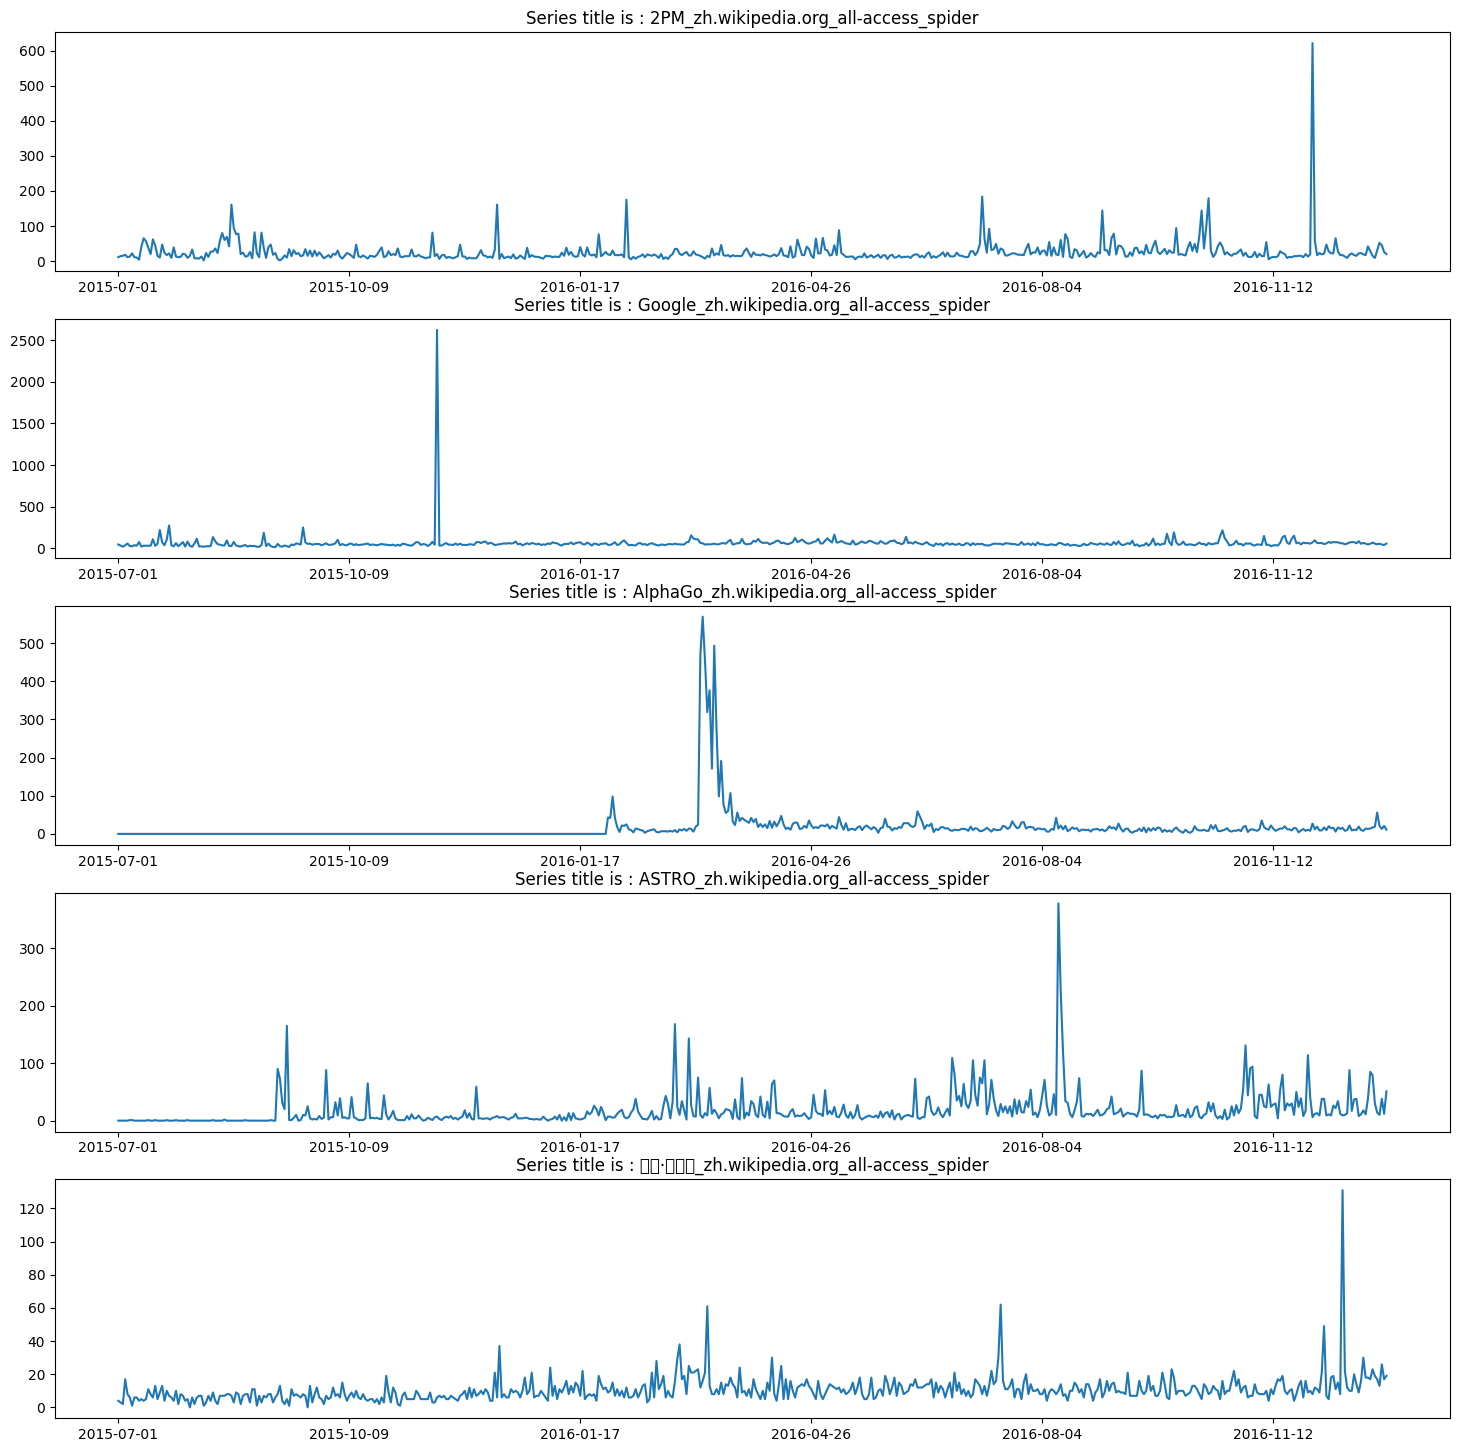

In [11]:
fig, axs  = plt.subplots(5,1,figsize=(18,18))
plot_time_series(df,1,1,ax=axs[0])
plot_time_series(df,65,1,ax=axs[1])
plot_time_series(df,13,1,ax=axs[2])
plot_time_series(df,10,1,ax=axs[3])
plot_time_series(df,543,1,ax=axs[4])

# Predicting on a small sample of data using RNN

In [7]:
#imports
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Getting a small sample of the data

In [54]:
rows=train.iloc[56000,:].values

In [55]:
print(rows[:10]),len(rows)

[ 960. 1286. 1193. 1440. 1444. 1038. 1143. 1109. 1209. 1229.]


(None, 550)

In [56]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [57]:
X=rows[0:549]
y=rows[1:550]

In [58]:
#Lets split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [59]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train.reshape(-1,1))
y_train = sc.fit_transform(y_train.reshape(-1,1))
X_test=sc.fit_transform(X_test.reshape(-1,1))
y_test=sc.fit_transform(X_test.reshape(-1,1))

In [60]:
X_train.shape,y_train.shape

((439, 1), (439, 1))

In [61]:
X_train=torch.tensor(X_train,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32)
y_test=torch.tensor(y_test,dtype=torch.float32)

In [62]:
X_train.shape,y_train.shape

(torch.Size([439, 1]), torch.Size([439, 1]))

In [63]:
X_test.shape,y_test.shape

(torch.Size([110, 1]), torch.Size([110, 1]))

In [64]:
device

'cuda'

In [65]:
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

In [66]:
X_train.device

device(type='cuda', index=0)

In [67]:
class SimpleRNN(nn.Module):
    def __init__(self,input_size,hidden_units,output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_units = hidden_units 
        self.rnn=nn.RNN(input_size,hidden_units,batch_first=True)
        self.fc=nn.Linear(hidden_units,output_size)

    def forward(self,x):
        h0 = torch.zeros(1, x.size(0), self.hidden_units).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)
        return out

In [68]:
model_0=SimpleRNN(input_size=1,hidden_units=40,output_size=1).to(device)

In [69]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model_0.parameters(), lr=0.001)

# Training loop
num_epochs = 300
train_loss=[]
for epoch in range(num_epochs):
    model_0.train()
    outputs = model_0(X_train.unsqueeze(-1))  # Add a dimension for input size
    loss = criterion(outputs, y_train.unsqueeze(-1))
    train_loss.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/300], Loss: 0.0058
Epoch [20/300], Loss: 0.0051
Epoch [30/300], Loss: 0.0046
Epoch [40/300], Loss: 0.0042
Epoch [50/300], Loss: 0.0038
Epoch [60/300], Loss: 0.0034
Epoch [70/300], Loss: 0.0030
Epoch [80/300], Loss: 0.0027
Epoch [90/300], Loss: 0.0024
Epoch [100/300], Loss: 0.0021
Epoch [110/300], Loss: 0.0019
Epoch [120/300], Loss: 0.0017
Epoch [130/300], Loss: 0.0016
Epoch [140/300], Loss: 0.0015
Epoch [150/300], Loss: 0.0014
Epoch [160/300], Loss: 0.0014
Epoch [170/300], Loss: 0.0014
Epoch [180/300], Loss: 0.0014
Epoch [190/300], Loss: 0.0014
Epoch [200/300], Loss: 0.0013
Epoch [210/300], Loss: 0.0013
Epoch [220/300], Loss: 0.0013
Epoch [230/300], Loss: 0.0013
Epoch [240/300], Loss: 0.0013
Epoch [250/300], Loss: 0.0013
Epoch [260/300], Loss: 0.0013
Epoch [270/300], Loss: 0.0013
Epoch [280/300], Loss: 0.0013
Epoch [290/300], Loss: 0.0013
Epoch [300/300], Loss: 0.0013


### Train Data Prediction

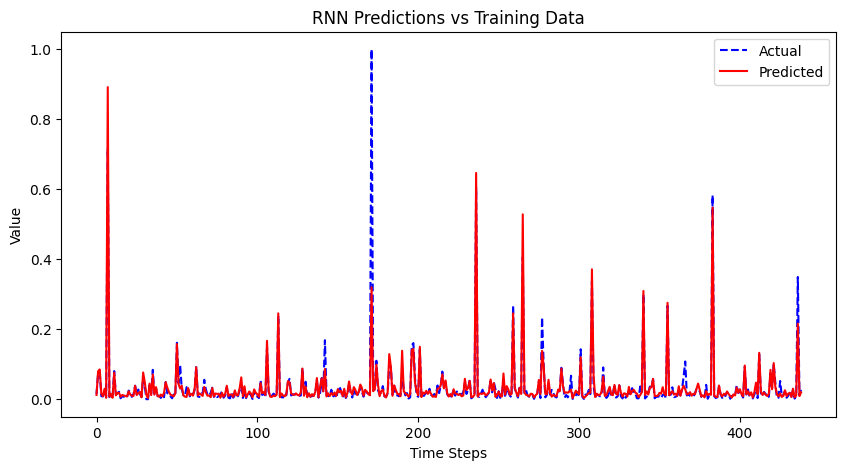

In [70]:
model_0.eval()
with torch.no_grad():
    predictions = model_0(X_train.unsqueeze(-1)).squeeze(-1).cpu().numpy()  # Remove extra dimension
    predictions =sc.inverse_transform(predictions.reshape(-1, 1))  # Reshape for inverse transform
    y_actual = sc.inverse_transform(y_train.cpu().numpy().reshape(-1, 1))


plt.figure(figsize=(10, 5))
plt.plot(y_actual, label="Actual", linestyle='dashed', color='blue')
plt.plot(predictions, label="Predicted", color='red')
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("RNN Predictions vs Training Data")
plt.legend()
plt.show()


Text(0.5, 1.0, 'Train Loss')

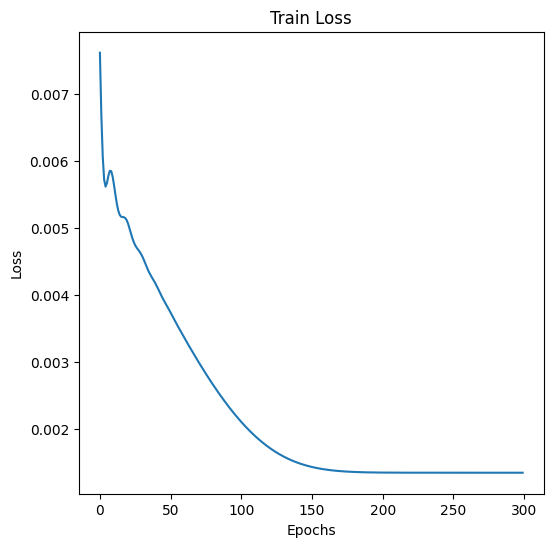

In [71]:
#Plot loss curves
epochs=range(len(train_loss))
plt.figure(figsize=(6,6))
plt.plot(epochs,train_loss,label="TrainLoss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train Loss")

### Test Data Prediction

In [72]:
X_test.shape,y_test.shape

(torch.Size([110, 1]), torch.Size([110, 1]))

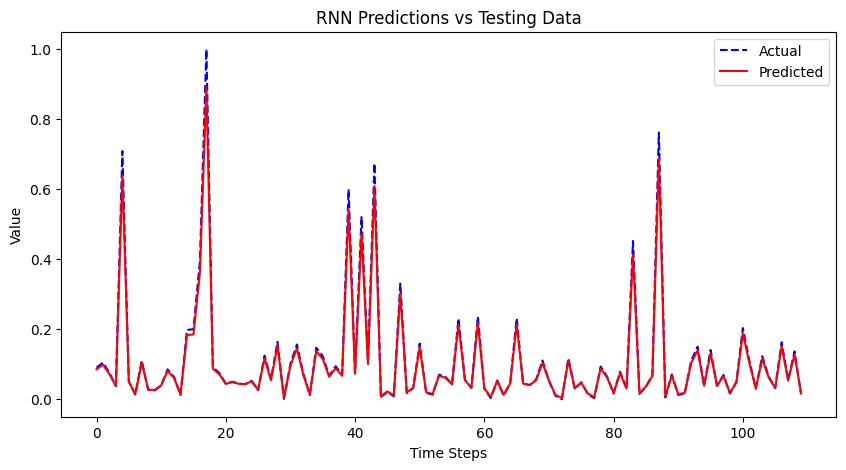

In [73]:
model_0.eval()
with torch.no_grad():
    predictions = model_0(X_test.unsqueeze(-1)).squeeze(-1).cpu().numpy()  # Remove extra dimension
    predictions =sc.inverse_transform(predictions.reshape(-1, 1))  # Reshape for inverse transform
    y_actual = sc.inverse_transform(y_test.cpu().numpy().reshape(-1, 1))


plt.figure(figsize=(10, 5))
plt.plot(y_actual, label="Actual", linestyle='dashed', color='blue')
plt.plot(predictions, label="Predicted", color='red')
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("RNN Predictions vs Testing Data")
plt.legend()
plt.show()


In [74]:
from torchinfo import summary

In [75]:
summary(model_0,input_size=(1,40,1))

Layer (type:depth-idx)                   Output Shape              Param #
SimpleRNN                                [1, 40, 1]                --
├─RNN: 1-1                               [1, 40, 40]               1,720
├─Linear: 1-2                            [1, 40, 1]                41
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
Total mult-adds (M): 0.07
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.01
Estimated Total Size (MB): 0.02

In [78]:
from torchmetrics.regression import MeanAbsoluteError, R2Score, MeanSquaredError, MeanSquaredLogError

model_0.eval()
with torch.no_grad():
    if X_test.dim() == 2:
        X_test = X_test.unsqueeze(0)
    y_preds = model_0(X_test.to(device))
    y_preds = y_preds.squeeze(0)

# Ensure non-negative for MSLE
y_preds = torch.clamp(y_preds, min=0)
y_test = torch.clamp(y_test, min=0)

# Metrics
mae = MeanAbsoluteError().to(device)
r2 = R2Score().to(device)
mse = MeanSquaredError().to(device)
msle = MeanSquaredLogError().to(device)

# Compute
mae_val = mae(y_preds, y_test.to(device))
r2_val = r2(y_preds, y_test.to(device))
mse_val = mse(y_preds, y_test.to(device))
msle_val = msle(y_preds, y_test.to(device))

# Print
print(f"The MAE is  {mae_val.item():.4f}")
print(f"The R2-score is {r2_val.item():.4f}")
print(f"The MSE is {mse_val.item():.4f}")
print(f"The MSLE is {msle_val.item():.4f}")


The MAE is  0.0165
The R2-score is 0.9733
The MSE is 0.0007
The MSLE is 0.0004


In [79]:
import pandas as pd

# Create a dictionary with metric values
metrics = {
    "Metric": ["MAE", "R2 Score", "MSE", "MSLE"],
    "Value": [
        mae_val.item(),
        r2_val.item(),
        mse_val.item(),
        msle_val.item()
    ]
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics)

# Save to Excel
df_metrics.to_excel("rnn_metrics.xlsx", index=False, engine='openpyxl')


# LSTM Prediction on a sample data

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [81]:
row=train.iloc[56000,:].values

In [82]:
row[:10]

array([ 960., 1286., 1193., 1440., 1444., 1038., 1143., 1109., 1209.,
       1229.])

In [83]:
X=row[:-1]
y=row[1:]

In [84]:
X.shape,y.shape

((549,), (549,))

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [86]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train.reshape(-1,1))
y_train=scaler.fit_transform(y_train.reshape(-1,1))

In [87]:
X_train = torch.tensor(X_train, dtype=torch.float32).view(-1, 1, 1)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

In [88]:
class LSTMModel(nn.Module):
    def __init__(self, input_shape, hidden_units , output_shape):
        super(LSTMModel,self).__init__()
        self.lstm=nn.LSTM(input_shape,hidden_units,output_shape)
        self.fc=nn.Linear(hidden_units,1)

    def forward(self,x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])
        return out
    
    

In [89]:
model = LSTMModel(1,32, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [90]:
epochs = 600
lstm_train_loss=[]
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    lstm_train_loss.append(loss.item())
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')

Epoch [10/600], Loss: 0.057814
Epoch [20/600], Loss: 0.028243
Epoch [30/600], Loss: 0.005141
Epoch [40/600], Loss: 0.005923
Epoch [50/600], Loss: 0.003451
Epoch [60/600], Loss: 0.001847
Epoch [70/600], Loss: 0.001781
Epoch [80/600], Loss: 0.001681
Epoch [90/600], Loss: 0.001585
Epoch [100/600], Loss: 0.001535
Epoch [110/600], Loss: 0.001492
Epoch [120/600], Loss: 0.001451
Epoch [130/600], Loss: 0.001410
Epoch [140/600], Loss: 0.001369
Epoch [150/600], Loss: 0.001331
Epoch [160/600], Loss: 0.001295
Epoch [170/600], Loss: 0.001263
Epoch [180/600], Loss: 0.001236
Epoch [190/600], Loss: 0.001212
Epoch [200/600], Loss: 0.001193
Epoch [210/600], Loss: 0.001177
Epoch [220/600], Loss: 0.001164
Epoch [230/600], Loss: 0.001154
Epoch [240/600], Loss: 0.001146
Epoch [250/600], Loss: 0.001139
Epoch [260/600], Loss: 0.001134
Epoch [270/600], Loss: 0.001130
Epoch [280/600], Loss: 0.001127
Epoch [290/600], Loss: 0.001124
Epoch [300/600], Loss: 0.001122
Epoch [310/600], Loss: 0.001120
Epoch [320/600], 

In [91]:
X_test=scaler.fit_transform(X_test.reshape(-1,1))
y_test=scaler.fit_transform(y_test.reshape(-1,1))

In [92]:
X_test = torch.tensor(X_test, dtype=torch.float32).view(-1, 1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

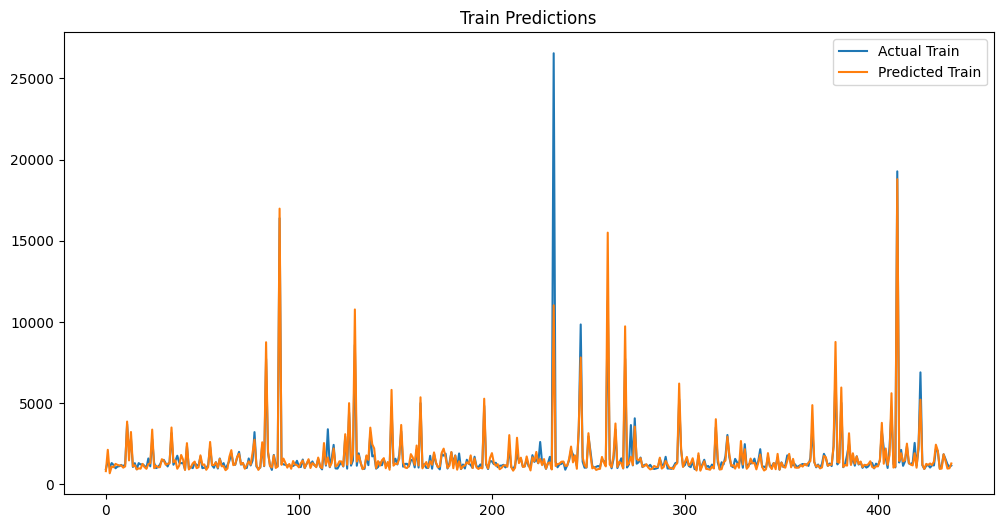

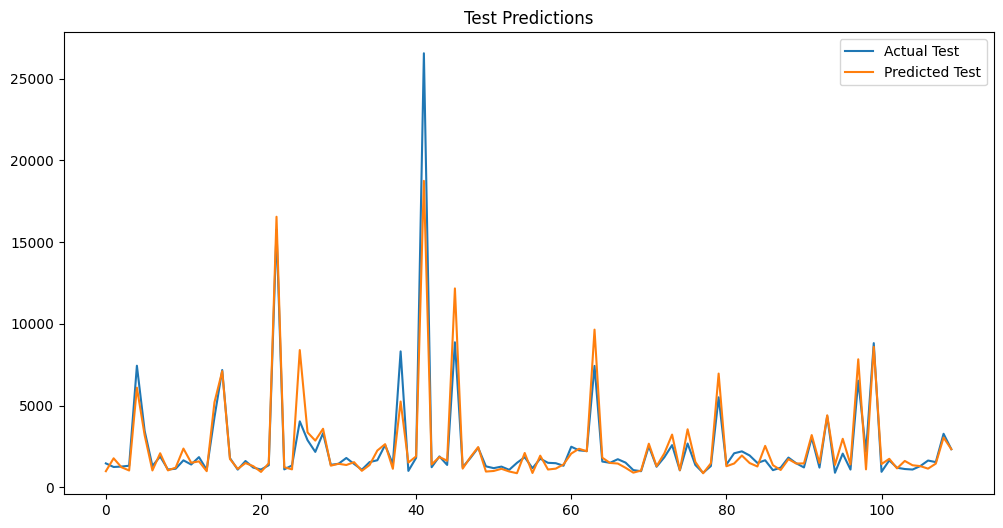

In [93]:
model.eval()
with torch.no_grad():
    train_predictions = model(X_train).numpy()
    test_predictions = model(X_test).numpy()

# Inverse transform predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train_original = scaler.inverse_transform(y_train.numpy())
test_predictions = scaler.inverse_transform(test_predictions)
y_test_original = scaler.inverse_transform(y_test.numpy())

# Plot results
plt.figure(figsize=(12,6))
plt.plot(y_train_original, label='Actual Train')
plt.plot(train_predictions, label='Predicted Train')
plt.legend()
plt.title('Train Predictions')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(y_test_original, label='Actual Test')
plt.plot(test_predictions, label='Predicted Test')
plt.legend()
plt.title('Test Predictions')
plt.show()

Text(0.5, 1.0, 'LSTM Train Loss')

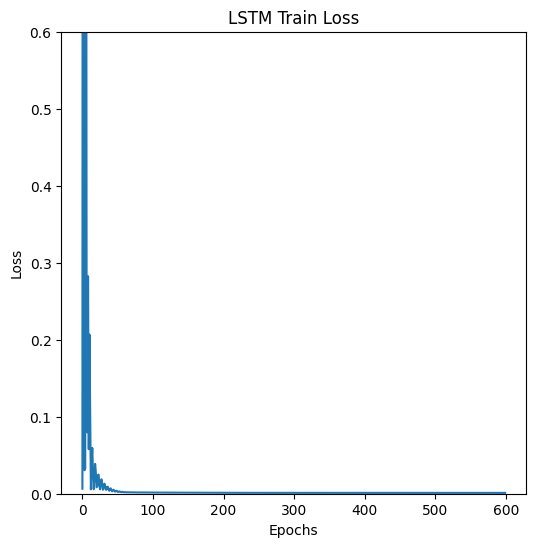

In [95]:
epochs=range(len(lstm_train_loss))
plt.figure(figsize=(6,6))
plt.plot(epochs,lstm_train_loss)
plt.ylim(0,0.6)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Train Loss")

In [96]:
summary(model,input_size=(1,32,1))

Layer (type:depth-idx)                   Output Shape              Param #
LSTMModel                                [1, 1]                    --
├─LSTM: 1-1                              [1, 32, 32]               4,480
├─Linear: 1-2                            [1, 1]                    33
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
Total mult-adds (M): 0.14
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.02
Estimated Total Size (MB): 0.03

In [97]:
test_row=train.iloc[5000].values
X_test_new=test_row[0:549]
y_test_new=test_row[1:550]

In [98]:
#split this into X_test and y_test
X_test_new.shape,y_test_new.shape

((549,), (549,))

In [99]:
X_test_new=scaler.fit_transform(X_test_new.reshape(-1,1))
y_test_new=scaler.fit_transform(y_test_new.reshape(-1,1))

In [100]:
X_test_new=torch.tensor(X_test_new,dtype=torch.float32,device=device)

In [101]:
y_test_new=torch.tensor(y_test_new,dtype=torch.float32,device=device)

In [102]:
X_test_new=X_test_new.view(-1,1,1)
y_test_new=y_test_new.view(-1,1)

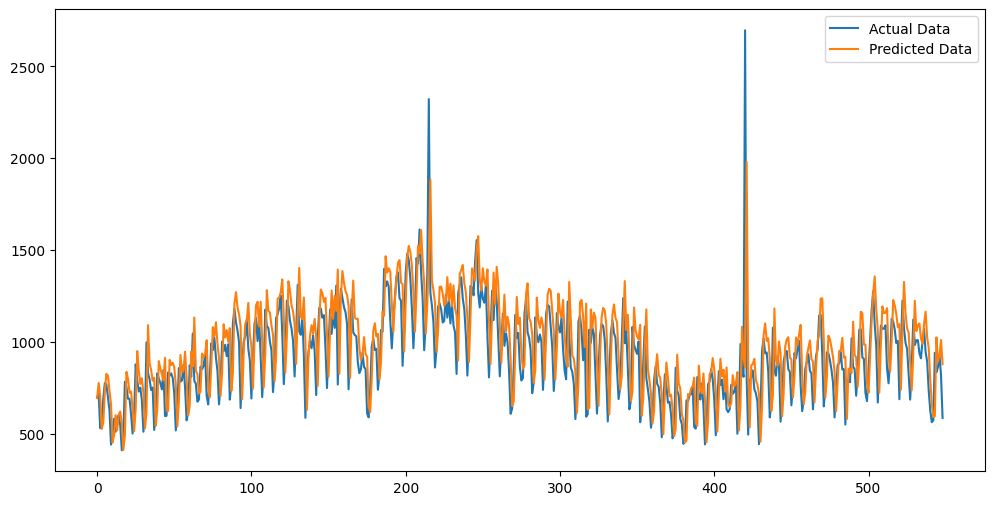

In [103]:
#make prediction on a new page.
model.eval
with torch.no_grad():
    preds=model(X_test_new).cpu().numpy()

#Inverse transform predictions
preds=scaler.inverse_transform(preds)
y_test_new_original=scaler.inverse_transform(y_test_new.cpu())

plt.figure(figsize=(12,6))
plt.plot(y_test_new_original,label="Actual Data")
plt.plot(preds,label="Predicted Data")
plt.legend()
plt.show()

# LSTM METRICS

In [104]:
from torchmetrics.regression import MeanAbsoluteError, R2Score, MeanSquaredError, MeanSquaredLogError

model.eval()
with torch.no_grad():
    y_preds = model(X_test.to(device))

# Ensure non-negative for MSLE
y_preds = torch.clamp(y_preds, min=0)
y_test = torch.clamp(y_test, min=0)

# Metrics
mae = MeanAbsoluteError().to(device)
r2 = R2Score().to(device)
mse = MeanSquaredError().to(device)
msle = MeanSquaredLogError().to(device)

# Compute
mae_val = mae(y_preds, y_test.to(device))
r2_val = r2(y_preds, y_test.to(device))
mse_val = mse(y_preds, y_test.to(device))
msle_val = msle(y_preds, y_test.to(device))

# Print
print(f"The MAE is  {mae_val.item():.4f}")
print(f"The R2-score is {r2_val.item():.4f}")
print(f"The MSE is {mse_val.item():.4f}")
print(f"The MSLE is {msle_val.item():.4f}")


The MAE is  0.0181
The R2-score is 0.8859
The MSE is 0.0017
The MSLE is 0.0008


In [105]:
import pandas as pd

# Create a dictionary with metric values
metrics = {
    "Metric": ["MAE", "R2 Score", "MSE", "MSLE"],
    "Value": [
        mae_val.item(),
        r2_val.item(),
        mse_val.item(),
        msle_val.item()
    ]
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics)

# Save to Excel
df_metrics.to_excel("lstm_metrics.xlsx", index=False, engine='openpyxl')


# Making a BI-LSTM Model

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [50]:
row=train.iloc[56000,:].values
X=row[:-1]
y=row[1:]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train.reshape(-1,1))
y_train=scaler.fit_transform(y_train.reshape(-1,1))
X_train = torch.tensor(X_train, dtype=torch.float32).view(-1, 1, 1)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

In [18]:
class bilstm(nn.Module):
    def __init__(self,input_shape,hidden_shape,output_shape):
        super(bilstm,self).__init__()
        self.lstm=nn.LSTM(input_size=input_shape,hidden_size=hidden_shape,num_layers=2,batch_first=True,bidirectional=True,dropout=0.2)
        self.fc = nn.Sequential(
            nn.Linear(2 * hidden_shape, 64),   # 2 * hidden_shape because the LSTM is bidirectional
            nn.ReLU(),                         # ReLU activation
            nn.Dropout(0.2),                   # Dropout layer for regularization
            nn.Linear(64, output_shape)        # Final output layer
        )

    def forward(self, x):
        output, _ = self.lstm(x)
        out = self.fc(output[:, -1, :])  # take only last time step
        return out  # shape: [batch, output_size]

        

In [21]:
bilstm_model=bilstm(1,32,1).to(device)

In [22]:
loss_fn=nn.MSELoss()

In [23]:
optimizer = optim.Adam(bilstm_model.parameters(), lr=0.001)

In [24]:
epochs = 400
bi_lstm_train_loss=[]
for epoch in range(epochs):
    bilstm_model.train()
    optimizer.zero_grad()
    outputs = bilstm_model(X_train.to(device))
    loss = loss_fn(outputs, y_train.to(device))
    bi_lstm_train_loss.append(loss.item())
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')

Epoch [10/400], Loss: 0.006557
Epoch [20/400], Loss: 0.006192
Epoch [30/400], Loss: 0.006026
Epoch [40/400], Loss: 0.005971
Epoch [50/400], Loss: 0.005866
Epoch [60/400], Loss: 0.005365
Epoch [70/400], Loss: 0.004783
Epoch [80/400], Loss: 0.003829
Epoch [90/400], Loss: 0.002500
Epoch [100/400], Loss: 0.001810
Epoch [110/400], Loss: 0.001679
Epoch [120/400], Loss: 0.001439
Epoch [130/400], Loss: 0.001356
Epoch [140/400], Loss: 0.001341
Epoch [150/400], Loss: 0.001904
Epoch [160/400], Loss: 0.001588
Epoch [170/400], Loss: 0.001200
Epoch [180/400], Loss: 0.001320
Epoch [190/400], Loss: 0.001422
Epoch [200/400], Loss: 0.001304
Epoch [210/400], Loss: 0.001337
Epoch [220/400], Loss: 0.001104
Epoch [230/400], Loss: 0.001324
Epoch [240/400], Loss: 0.001347
Epoch [250/400], Loss: 0.001353
Epoch [260/400], Loss: 0.000950
Epoch [270/400], Loss: 0.001291
Epoch [280/400], Loss: 0.001090
Epoch [290/400], Loss: 0.001115
Epoch [300/400], Loss: 0.001544
Epoch [310/400], Loss: 0.001078
Epoch [320/400], 

In [51]:
X_test=scaler.fit_transform(X_test.reshape(-1,1))
y_test=scaler.fit_transform(y_test.reshape(-1,1))
X_test = torch.tensor(X_test, dtype=torch.float32).view(-1, 1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Metrics for BILSTM

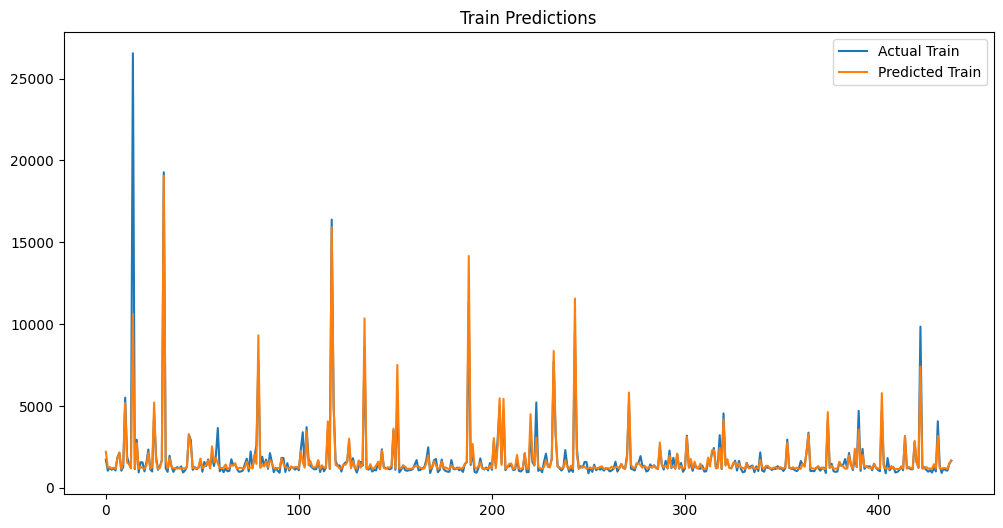

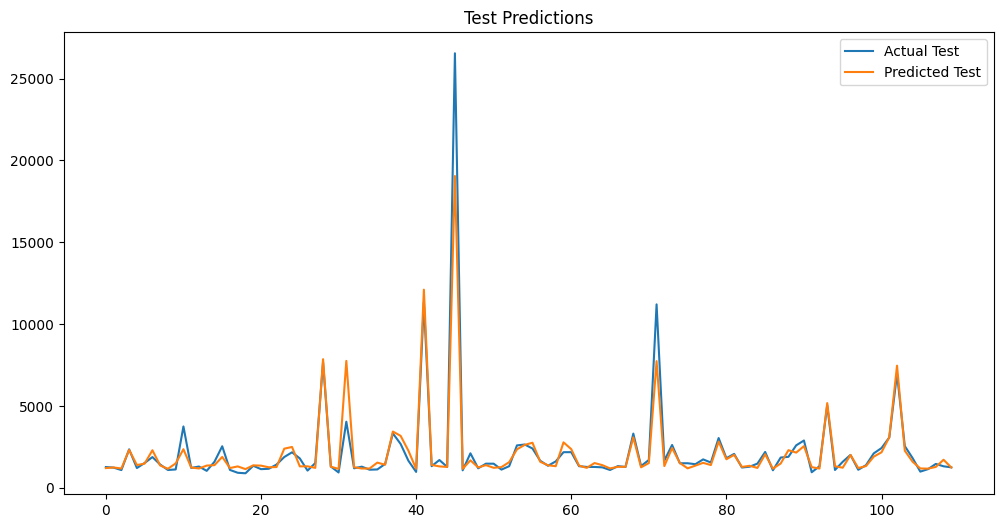

In [28]:
import matplotlib.pyplot as plt
bilstm_model.eval()
with torch.no_grad():
    train_predictions = bilstm_model(X_train.to(device)).cpu().numpy()
    test_predictions = bilstm_model(X_test.to(device)).cpu().numpy()

# Inverse transform predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train_original = scaler.inverse_transform(y_train.numpy())
test_predictions = scaler.inverse_transform(test_predictions)
y_test_original = scaler.inverse_transform(y_test.numpy())

# Plot results
plt.figure(figsize=(12,6))
plt.plot(y_train_original, label='Actual Train')
plt.plot(train_predictions, label='Predicted Train')
plt.legend()
plt.title('Train Predictions')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(y_test_original, label='Actual Test')
plt.plot(test_predictions, label='Predicted Test')
plt.legend()
plt.title('Test Predictions')
plt.show()

# Metrics for BI-LSTM Model




1. **MAPE (Mean Absolute Percentage Error)**: Measures the average absolute difference between the predicted and actual values, expressed as a percentage of the actual values. Lower MAPE indicates better model performance.

2. **R² Score (Coefficient of Determination)**: Represents the proportion of the variance in the target variable that is predictable from the input features. Values closer to 1 indicate better model fit.

3. **FVU (Fraction of Variance Unexplained)**: The fraction of the variance in the target variable that is not explained by the model. It is calculated as \( 1 - R^2 \), and lower values indicate a better fit.

4. **sMAPE (Symmetric Mean Absolute Percentage Error)**: A symmetric version of MAPE that handles cases where actual values are near zero, ensuring that errors are balanced. Values closer to 0% indicate better predictions.



In [52]:
from torchmetrics.regression import MeanAbsoluteError, R2Score, MeanSquaredError, MeanSquaredLogError

bilstm_model.eval()
with torch.no_grad():
    y_preds = bilstm_model(X_test.to(device))

# Ensure non-negative for MSLE
y_preds = torch.clamp(y_preds, min=0)
y_test = torch.clamp(y_test, min=0)

# Metrics
mae = MeanAbsoluteError().to(device)
r2 = R2Score().to(device)
mse = MeanSquaredError().to(device)
msle = MeanSquaredLogError().to(device)

# Compute
mae_val = mae(y_preds, y_test.to(device))
r2_val = r2(y_preds, y_test.to(device))
mse_val = mse(y_preds, y_test.to(device))
msle_val = msle(y_preds, y_test.to(device))

# Print
print(f"The MAE is  {mae_val.item():.4f}")
print(f"The R2-score is {r2_val.item():.4f}")
print(f"The MSE is {mse_val.item():.4f}")
print(f"The MSLE is {msle_val.item():.4f}")


The MAE is  0.0144
The R2-score is 0.9108
The MSE is 0.0012
The MSLE is 0.0006


In [53]:
import pandas as pd

# Create a dictionary with metric values
metrics = {
    "Metric": ["MAE", "R2 Score", "MSE", "MSLE"],
    "Value": [
        mae_val.item(),
        r2_val.item(),
        mse_val.item(),
        msle_val.item()
    ]
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics)

# Save to Excel
df_metrics.to_excel("bilstm_metrics.xlsx", index=False, engine='openpyxl')
